In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
original_data = pd.read_csv('./Data_clean')
data = original_data.copy()

In [5]:
data.head()

,Unnamed: 0,N_factura,ID_Cliente,País,Cantidad,Monto,Fecha,Continente,Mes,Dia,Año,Periodo,Out_kingdom,Volumen_cantidad
0,0,548370,15528.0,United Kingdom,123,229.33,2021-03-30 16:14:00,Europa,Marzo,30,2021,2021 03,0,100<=x<=300
1,1,575767,17348.0,United Kingdom,163,209.73,2021-11-11 11:11:00,Europa,Noviembre,11,2021,2021 11,0,100<=x<=300
2,3,549106,17045.0,United Kingdom,1,39.95,2021-04-06 12:08:00,Europa,Abril,6,2021,2021 04,0,x<100
3,4,573112,16416.0,United Kingdom,357,344.83,2021-10-27 15:33:00,Europa,Octubre,27,2021,2021 10,0,300<=x<=600
4,5,576630,13816.0,Germany,91,199.98,2021-11-16 08:38:00,Europa,Noviembre,16,2021,2021 11,1,x<100


# Promedio de ventas por meses y Mediana de ventas por mes

## Calculo del promedio

In [6]:
# creare un array que guarde los periodos de venta    
periodos = data['Periodo'].value_counts().reset_index(name='cantidad')
lista_periodos = periodos['index']

# la funcion calcula el promedio vendido dependiendo del periodo mediante una logica
def calcular_promedio_periodo(lista):

    promedio_periodo = []
    
    for i in lista_periodos:
        # este array es una pequeña tabla donde solo tienen los datos que corresponden con i
        array = lista[lista['Periodo'] == i]
        valor_promedio_periodo = array['Monto'].mean()
        
        promedio_periodo.append(valor_promedio_periodo)
        
    return(promedio_periodo)

promedio_periodos = calcular_promedio_periodo(data)

# organizaremos en nivel ascendente los periodos
indices_periodos = np.argsort(lista_periodos)
# crearemos lista que sigan este orden para no perder la relacion
periodos_promedio = [lista_periodos[i] for i in indices_periodos]
promedio = [promedio_periodos[i] for i in indices_periodos]

## Calculo de la Mediana

In [44]:
from statistics import median
# creare un array que guarde los periodos de venta    
periodos = data['Periodo'].value_counts().reset_index(name='cantidad')
lista_periodos = periodos['index']

# la funcion calcula el promedio vendido dependiendo del periodo mediante una logica
def calcular_mediana_periodo(lista):

    mediana_periodo = []
    
    for i in lista_periodos:
        # este array es una pequeña tabla donde solo tienen los datos que corresponden con i
        array = lista[lista['Periodo'] == i]
        valor_mediana_periodo = median(array['Monto'])
        
        mediana_periodo.append(valor_mediana_periodo)
        
    return(mediana_periodo)

mediana_periodos = calcular_mediana_periodo(data)

# organizaremos en nivel ascendente los periodos
indices_periodos = np.argsort(lista_periodos)
# crearemos lista que sigan este orden para no perder la relacion
periodos_mediana = [lista_periodos[i] for i in indices_periodos]
mediana = [mediana_periodos[i] for i in indices_periodos]

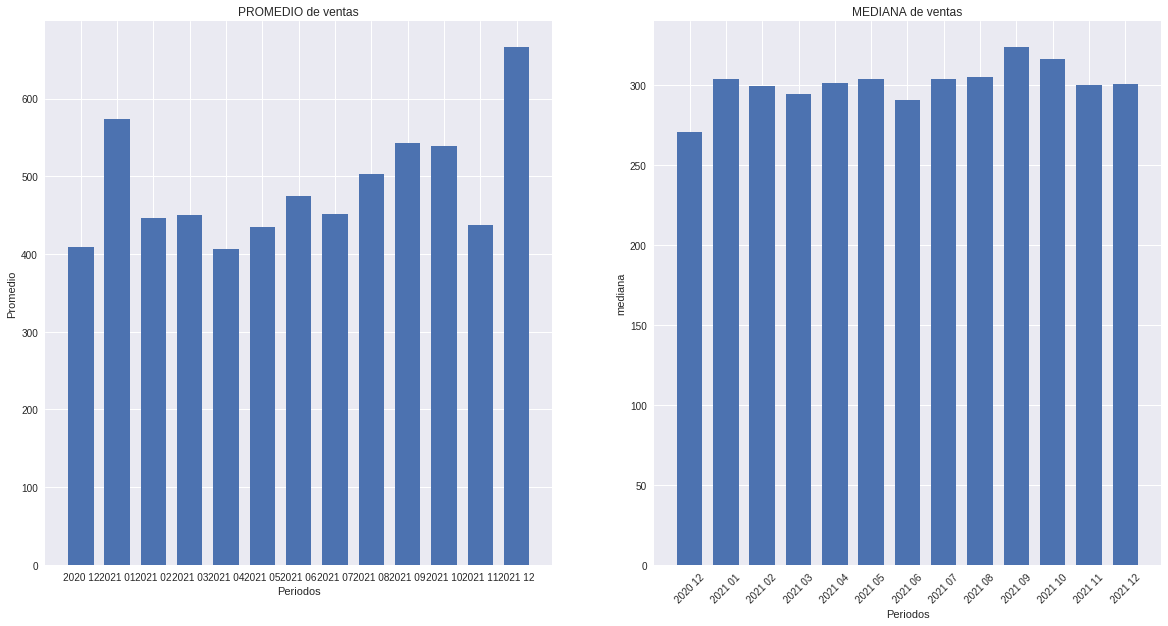

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
plt.style.use('seaborn')
plt.xticks(rotation=45)
height=0.7

ax[0].bar(periodos_promedio, promedio, height)
ax[0].set_title('PROMEDIO de ventas')
ax[0].set_xlabel('Periodos')
ax[0].set_ylabel('Promedio')


ax[1].bar(periodos_mediana, mediana, height)
ax[1].set_title('MEDIANA de ventas')
ax[1].set_xlabel('Periodos')
ax[1].set_ylabel('mediana')

plt.show()
